# Segmentation of credit card Customer 

#### importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# setting the plot size for graphs:
plt.rcParams['figure.figsize'] = (8,6)

####   importing the data 

In [3]:
data = pd.read_csv("credit_card.csv", index_col=0)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Data Exploration 

In [4]:
data.shape

(8950, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

In [6]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.47,2081.53,0.00,128.28,873.39,2054.14,19043.14
BALANCE_FREQUENCY,8950.0,0.88,0.24,0.00,0.89,1.00,1.00,1.00
PURCHASES,8950.0,1003.20,2136.63,0.00,39.64,361.28,1110.13,49039.57
ONEOFF_PURCHASES,8950.0,592.44,1659.89,0.00,0.00,38.00,577.40,40761.25
INSTALLMENTS_PURCHASES,8950.0,411.07,904.34,0.00,0.00,89.00,468.64,22500.00
CASH_ADVANCE,8950.0,978.87,2097.16,0.00,0.00,0.00,1113.82,47137.21
PURCHASES_FREQUENCY,8950.0,0.49,0.40,0.00,0.08,0.50,0.92,1.00
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.20,0.30,0.00,0.00,0.08,0.30,1.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.36,0.40,0.00,0.00,0.17,0.75,1.00
CASH_ADVANCE_FREQUENCY,8950.0,0.14,0.20,0.00,0.00,0.00,0.22,1.50


In [7]:
# createing the copying 
df= data.copy()

#### Missing Values 

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

To treat for the missing values in Minimum_Payments shall impute with median values of Minimum Payments and will drop the one missing value of Credit Limit.

In [9]:
df[df["CREDIT_LIMIT"].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [10]:
# dropping  off the missing  value for Credit Limit 
df.drop(index = "C15349" , inplace = True)


In [11]:
# resetting the index after dropping the record:
df = df.reset_index(drop=True)

In [12]:
df["MINIMUM_PAYMENTS"].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [13]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace = True)

In [14]:
# Checking again to confirm if missing values are present or not:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
org_data=df.copy()

In [17]:
org_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### finding out duplicates 

In [18]:
duplicate = df.duplicated()
duplicate.unique()

array([False])

#### Outliers Treatment 

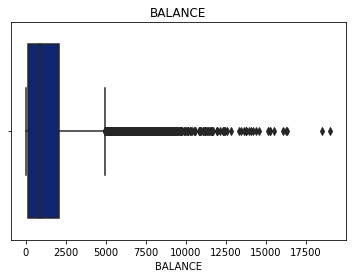

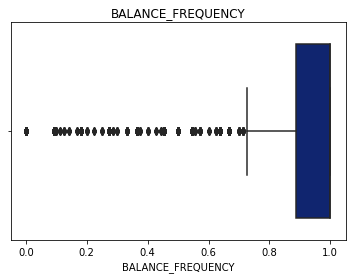

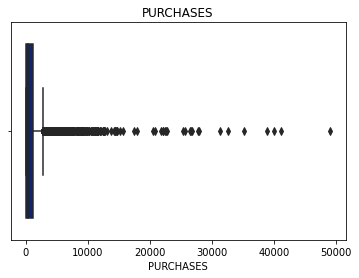

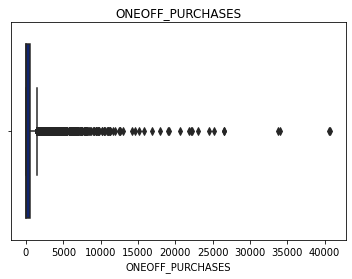

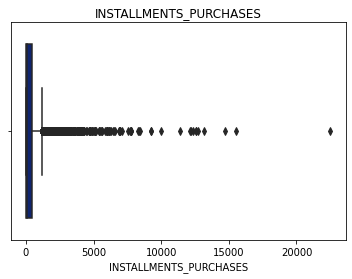

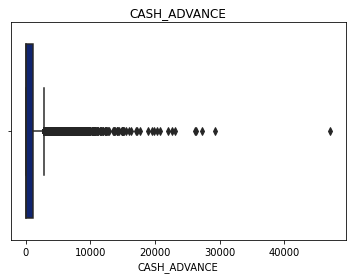

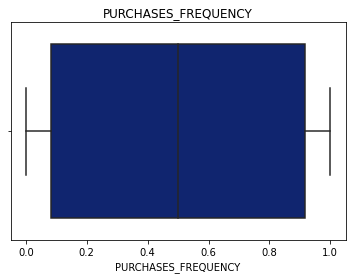

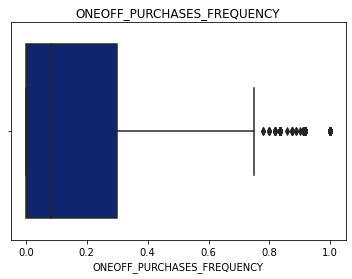

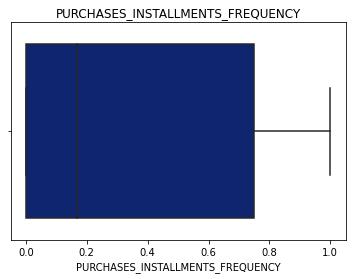

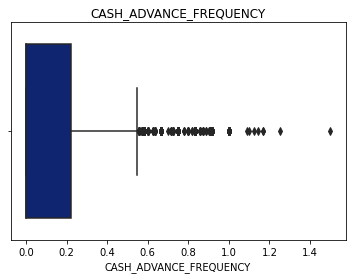

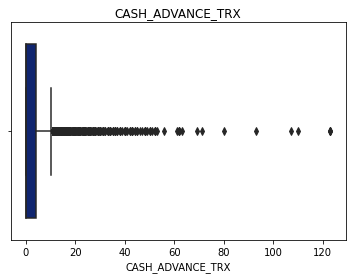

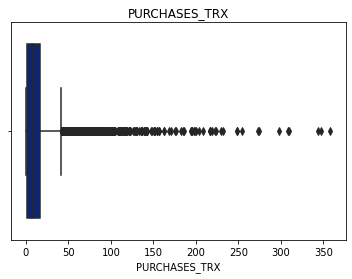

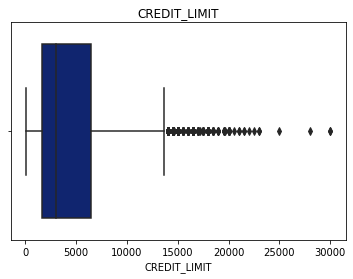

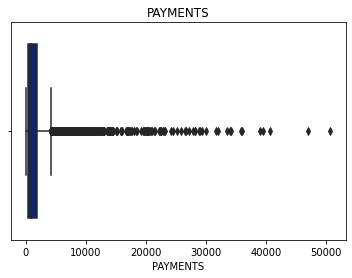

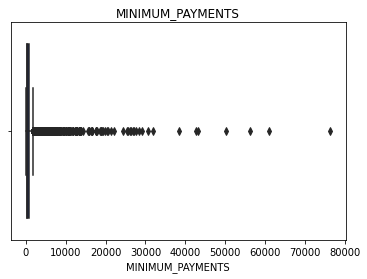

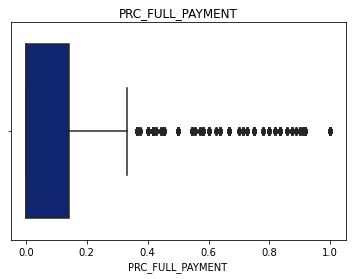

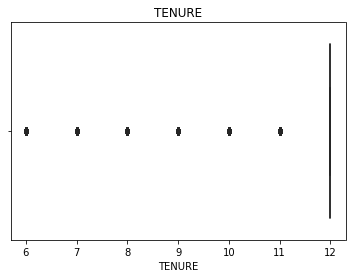

In [19]:
# Box plot 
for i in df.columns:
    sns.boxplot(df[i], palette="dark")
    plt.title("{}".format(i))
    plt.show()

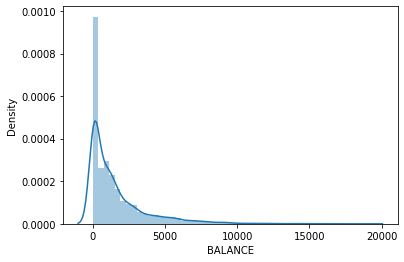

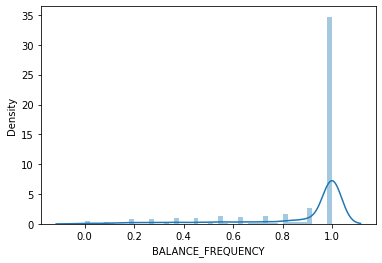

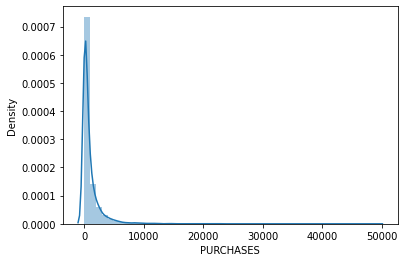

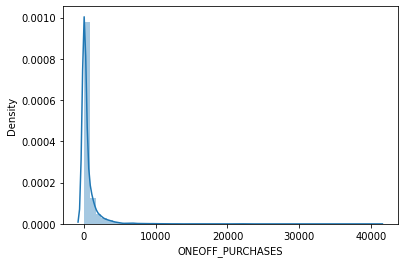

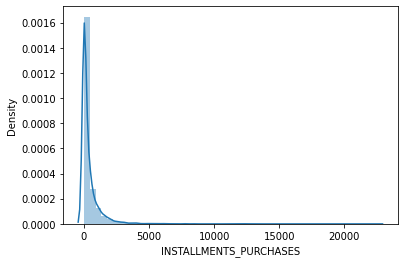

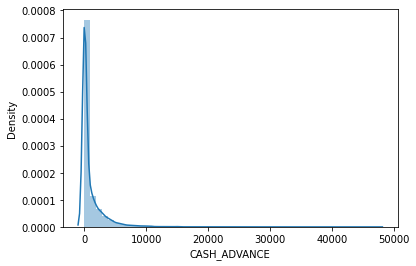

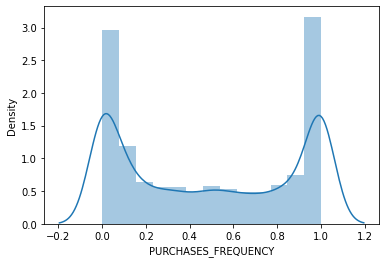

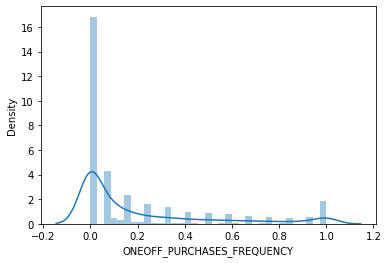

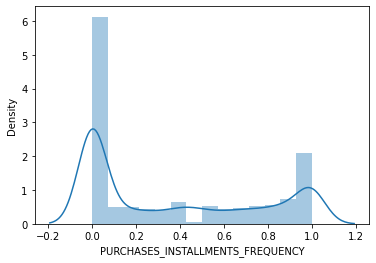

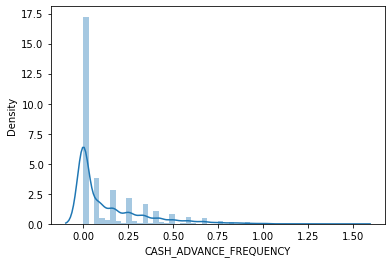

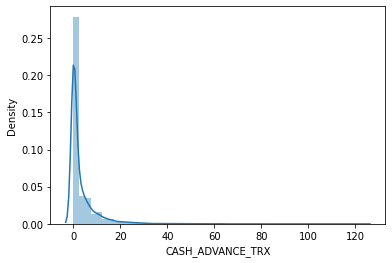

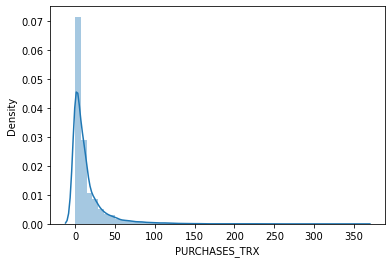

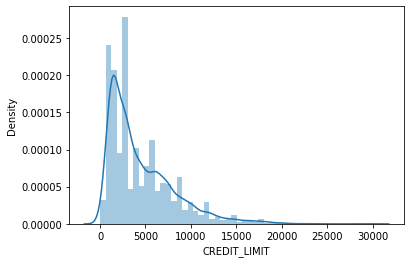

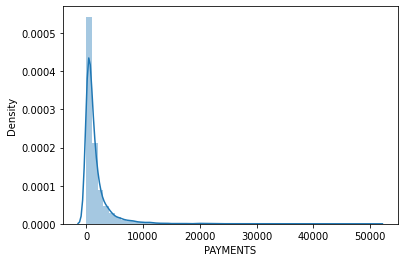

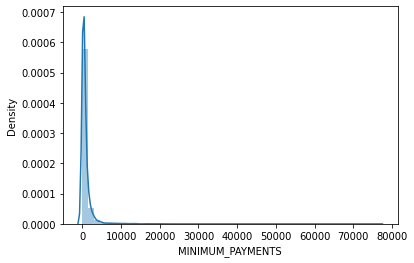

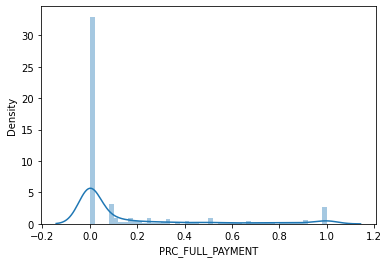

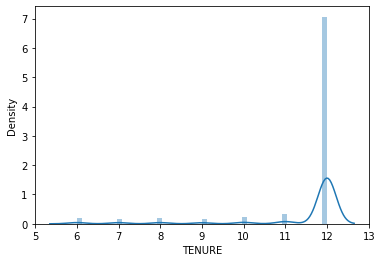

In [20]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    



In [22]:
df = np.log1p(df)

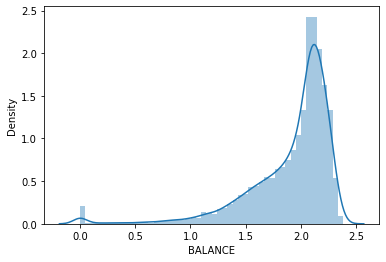

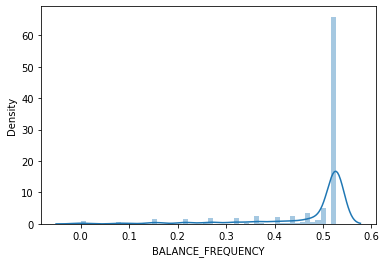

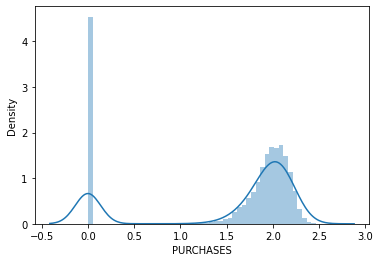

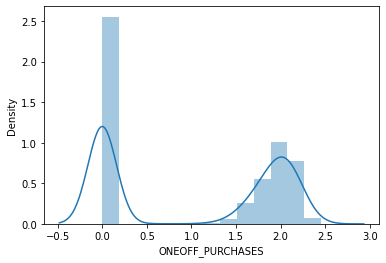

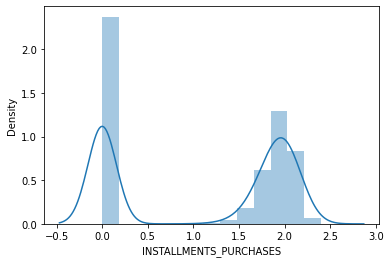

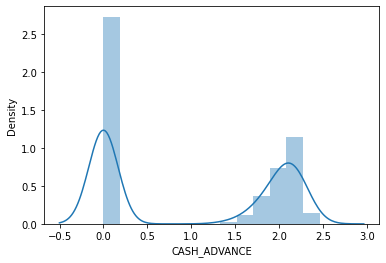

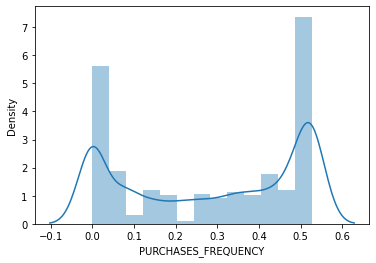

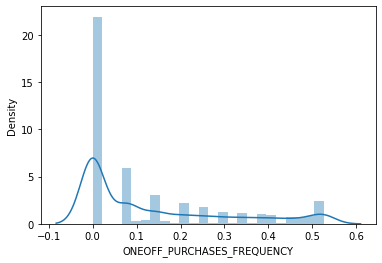

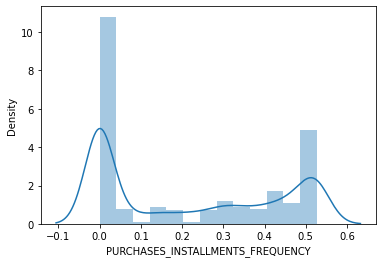

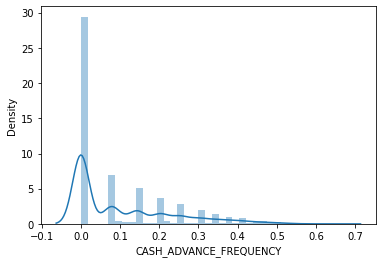

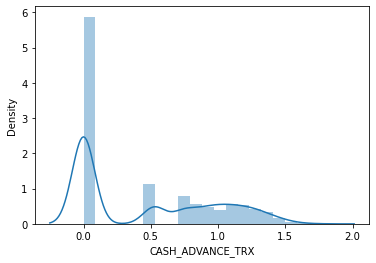

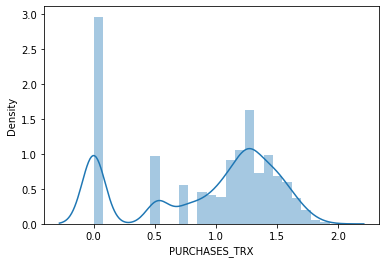

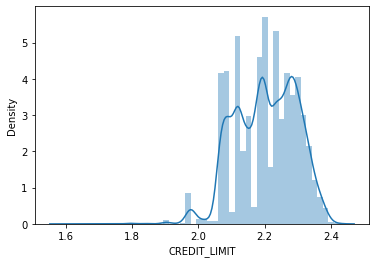

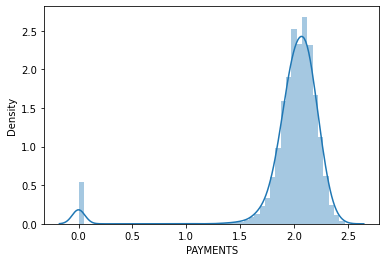

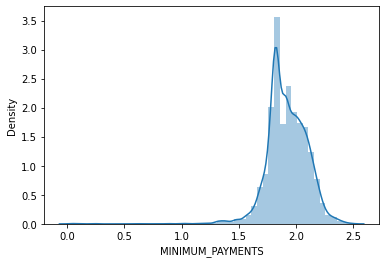

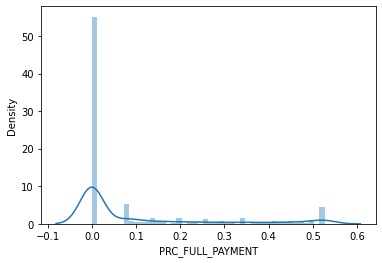

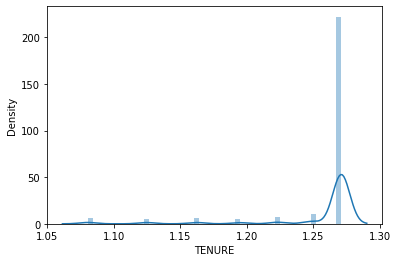

In [23]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

#### OUtliear Treatment using the Z-score 

In [24]:
import scipy.stats as stats
arr=stats.zscore(df)
arr

array([[-0.92428293, -0.08458296,  0.2268586 , ..., -0.76163909,
        -0.57914893,  0.34266744],
       [ 0.76465846,  0.20446537, -1.79721942, ...,  0.88289316,
         0.52128919,  0.34266744],
       [ 0.69221711,  0.47219674,  0.60148337, ...,  0.49444772,
        -0.57914893,  0.34266744],
       ...,
       [-1.23930349, -0.03480217,  0.31079589, ..., -1.27479359,
         0.63287371, -4.49647041],
       [-1.58547858, -0.03480217, -1.79721942, ..., -1.68654742,
         0.63287371, -4.49647041],
       [ 0.06254427, -0.62268453,  0.65361959, ..., -1.2051288 ,
        -0.57914893, -4.49647041]])

In [25]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [26]:
# convert  numpy array to dataframe 
df = pd.DataFrame(arr, columns =['BALANCE_Z', 'BALANCE_FREQUENCY_Z', 'PURCHASES_Z', 'ONEOFF_PURCHASES_Z',
       'INSTALLMENTS_PURCHASES_Z', 'CASH_ADVANCE_Z', 'PURCHASES_FREQUENCY_Z',
       'ONEOFF_PURCHASES_FREQUENCY_Z', 'PURCHASES_INSTALLMENTS_FREQUENCY_Z',
       'CASH_ADVANCE_FREQUENCY_Z', 'CASH_ADVANCE_TRX_Z', 'PURCHASES_TRX_Z',
       'CREDIT_LIMIT_Z', 'PAYMENTS_Z', 'MINIMUM_PAYMENTS_Z', 'PRC_FULL_PAYMENT_Z',
       'TENURE_Z'])
#print("\nPandas DataFrame: ")
df.head()

,BALANCE_Z,BALANCE_FREQUENCY_Z,PURCHASES_Z,ONEOFF_PURCHASES_Z,INSTALLMENTS_PURCHASES_Z,CASH_ADVANCE_Z,PURCHASES_FREQUENCY_Z,ONEOFF_PURCHASES_FREQUENCY_Z,PURCHASES_INSTALLMENTS_FREQUENCY_Z,CASH_ADVANCE_FREQUENCY_Z,CASH_ADVANCE_TRX_Z,PURCHASES_TRX_Z,CREDIT_LIMIT_Z,PAYMENTS_Z,MINIMUM_PAYMENTS_Z,PRC_FULL_PAYMENT_Z,TENURE_Z
0,-0.924283,-0.084583,0.226859,-1.024883,0.657658,-0.958165,-0.682705,-0.772870,-0.633576,-0.759193,-0.887772,-0.308996,-1.485112,-0.400269,-0.761639,-0.579149,0.342667
1,0.764658,0.204465,-1.797219,-1.024883,-1.123101,1.252320,-1.365022,-0.772870,-0.986989,0.791332,0.972476,-1.598113,0.922990,0.667956,0.882893,0.521289,0.342667
2,0.692217,0.472197,0.601483,1.037597,-1.123101,-0.958165,1.141174,2.313862,-0.986989,-0.759193,-0.887772,0.612481,0.999391,0.048419,0.494448,-0.579149,0.342667
3,0.570659,-0.740112,0.699211,1.121626,-1.123101,0.831598,-0.998555,-0.321513,-0.986989,-0.166460,0.133551,-0.682348,0.999391,-5.451526,-0.053880,-0.579149,0.342667
4,0.341304,0.472197,-0.213317,0.337006,-1.123101,-0.958165,-0.998555,-0.321513,-0.986989,-0.759193,-0.887772,-0.682348,-1.235737,0.080118,-0.259070,-0.579149,0.342667


In [27]:
df.describe().T.round(2)


,count,mean,std,min,25%,50%,75%,max
BALANCE_Z,8949.0,-0.0,1.0,-4.96,-0.37,0.36,0.63,1.23
BALANCE_FREQUENCY_Z,8949.0,-0.0,1.0,-4.59,0.14,0.47,0.47,0.47
PURCHASES_Z,8949.0,0.0,1.0,-1.80,0.03,0.48,0.66,1.11
ONEOFF_PURCHASES_Z,8949.0,0.0,1.0,-1.02,-1.02,0.54,1.00,1.46
INSTALLMENTS_PURCHASES_Z,8949.0,-0.0,1.0,-1.12,-1.12,0.64,0.92,1.37
CASH_ADVANCE_Z,8949.0,0.0,1.0,-0.96,-0.96,-0.96,1.06,1.43
PURCHASES_FREQUENCY_Z,8949.0,0.0,1.0,-1.37,-1.00,0.25,1.02,1.14
ONEOFF_PURCHASES_FREQUENCY_Z,8949.0,0.0,1.0,-0.77,-0.77,-0.32,0.59,2.31
PURCHASES_INSTALLMENTS_FREQUENCY_Z,8949.0,0.0,1.0,-0.99,-0.99,-0.33,1.05,1.43
CASH_ADVANCE_FREQUENCY_Z,8949.0,-0.0,1.0,-0.76,-0.76,-0.76,0.65,4.25


In [28]:
df.shape

(8949, 17)

In [ ]:
### removing outliear from the data 

In [29]:
combine=pd.concat([org_data,df],axis=1)

In [30]:
combine.shape

(8949, 34)

In [31]:
combine. head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,ONEOFF_PURCHASES_FREQUENCY_Z,PURCHASES_INSTALLMENTS_FREQUENCY_Z,CASH_ADVANCE_FREQUENCY_Z,CASH_ADVANCE_TRX_Z,PURCHASES_TRX_Z,CREDIT_LIMIT_Z,PAYMENTS_Z,MINIMUM_PAYMENTS_Z,PRC_FULL_PAYMENT_Z,TENURE_Z
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,-0.772870,-0.633576,-0.759193,-0.887772,-0.308996,-1.485112,-0.400269,-0.761639,-0.579149,0.342667
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,-0.772870,-0.986989,0.791332,0.972476,-1.598113,0.922990,0.667956,0.882893,0.521289,0.342667
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,2.313862,-0.986989,-0.759193,-0.887772,0.612481,0.999391,0.048419,0.494448,-0.579149,0.342667
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,-0.321513,-0.986989,-0.166460,0.133551,-0.682348,0.999391,-5.451526,-0.053880,-0.579149,0.342667
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,-0.321513,-0.986989,-0.759193,-0.887772,-0.682348,-1.235737,0.080118,-0.259070,-0.579149,0.342667


In [32]:
combine.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8949.0,1.564648e+03,2081.584016,0.000000,128.365782,873.680279,2054.372848,19043.138560
BALANCE_FREQUENCY,8949.0,8.773501e-01,0.236798,0.000000,0.888889,1.000000,1.000000,1.000000
PURCHASES,8949.0,1.003317e+03,2136.727848,0.000000,39.800000,361.490000,1110.170000,49039.570000
ONEOFF_PURCHASES,8949.0,5.925036e+02,1659.968851,0.000000,0.000000,38.000000,577.830000,40761.250000
INSTALLMENTS_PURCHASES,8949.0,4.111136e+02,904.378205,0.000000,0.000000,89.000000,468.650000,22500.000000
CASH_ADVANCE,8949.0,9.789596e+02,2097.264344,0.000000,0.000000,0.000000,1113.868654,47137.211760
PURCHASES_FREQUENCY,8949.0,4.904053e-01,0.401360,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8949.0,2.024803e-01,0.298345,0.000000,0.000000,0.083333,0.300000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8949.0,3.644781e-01,0.397451,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8949.0,1.351407e-01,0.200132,0.000000,0.000000,0.000000,0.222222,1.500000


In [36]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 8879
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BALANCE                             7985 non-null   float64
 1   BALANCE_FREQUENCY                   7985 non-null   float64
 2   PURCHASES                           7985 non-null   float64
 3   ONEOFF_PURCHASES                    7985 non-null   float64
 4   INSTALLMENTS_PURCHASES              7985 non-null   float64
 5   CASH_ADVANCE                        7985 non-null   float64
 6   PURCHASES_FREQUENCY                 7985 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY          7985 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY    7985 non-null   float64
 9   CASH_ADVANCE_FREQUENCY              7985 non-null   float64
 10  CASH_ADVANCE_TRX                    7985 non-null   int64  
 11  PURCHASES_TRX                       7985 no

In [33]:
### removing outliear from the data 

In [34]:
for i in combine.columns[17:]:
    combine = combine[ (combine[i] <= 3) & (combine[i] >= -3)] 

In [37]:
combine.shape

(7985, 34)

In [39]:
combine.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,7985.0,1639.470149,2093.487838,2.117128,179.765708,969.346477,2160.127684,19043.138560
BALANCE_FREQUENCY,7985.0,0.913662,0.180107,0.200000,0.909091,1.000000,1.000000,1.000000
PURCHASES,7985.0,1076.487889,2232.131250,0.000000,53.800000,411.300000,1213.230000,49039.570000
ONEOFF_PURCHASES,7985.0,637.077492,1741.182106,0.000000,0.000000,55.000000,642.330000,40761.250000
INSTALLMENTS_PURCHASES,7985.0,439.743100,937.015598,0.000000,0.000000,109.960000,509.940000,22500.000000
CASH_ADVANCE,7985.0,953.310646,1999.212586,0.000000,0.000000,0.000000,1099.152158,29282.109150
PURCHASES_FREQUENCY,7985.0,0.506538,0.400548,0.000000,0.083333,0.500000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,7985.0,0.213542,0.304930,0.000000,0.000000,0.083333,0.333333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,7985.0,0.378485,0.400367,0.000000,0.000000,0.250000,0.800000,1.000000
CASH_ADVANCE_FREQUENCY,7985.0,0.130028,0.186863,0.000000,0.000000,0.000000,0.222222,0.875000


#### An outlier of data is defined as a value that is more than 3 and less then  -3 standard deviations from the mean. are been removed 

In [42]:
df1 = combine.iloc[:,:17]
df1.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


# Correlation Matrix  

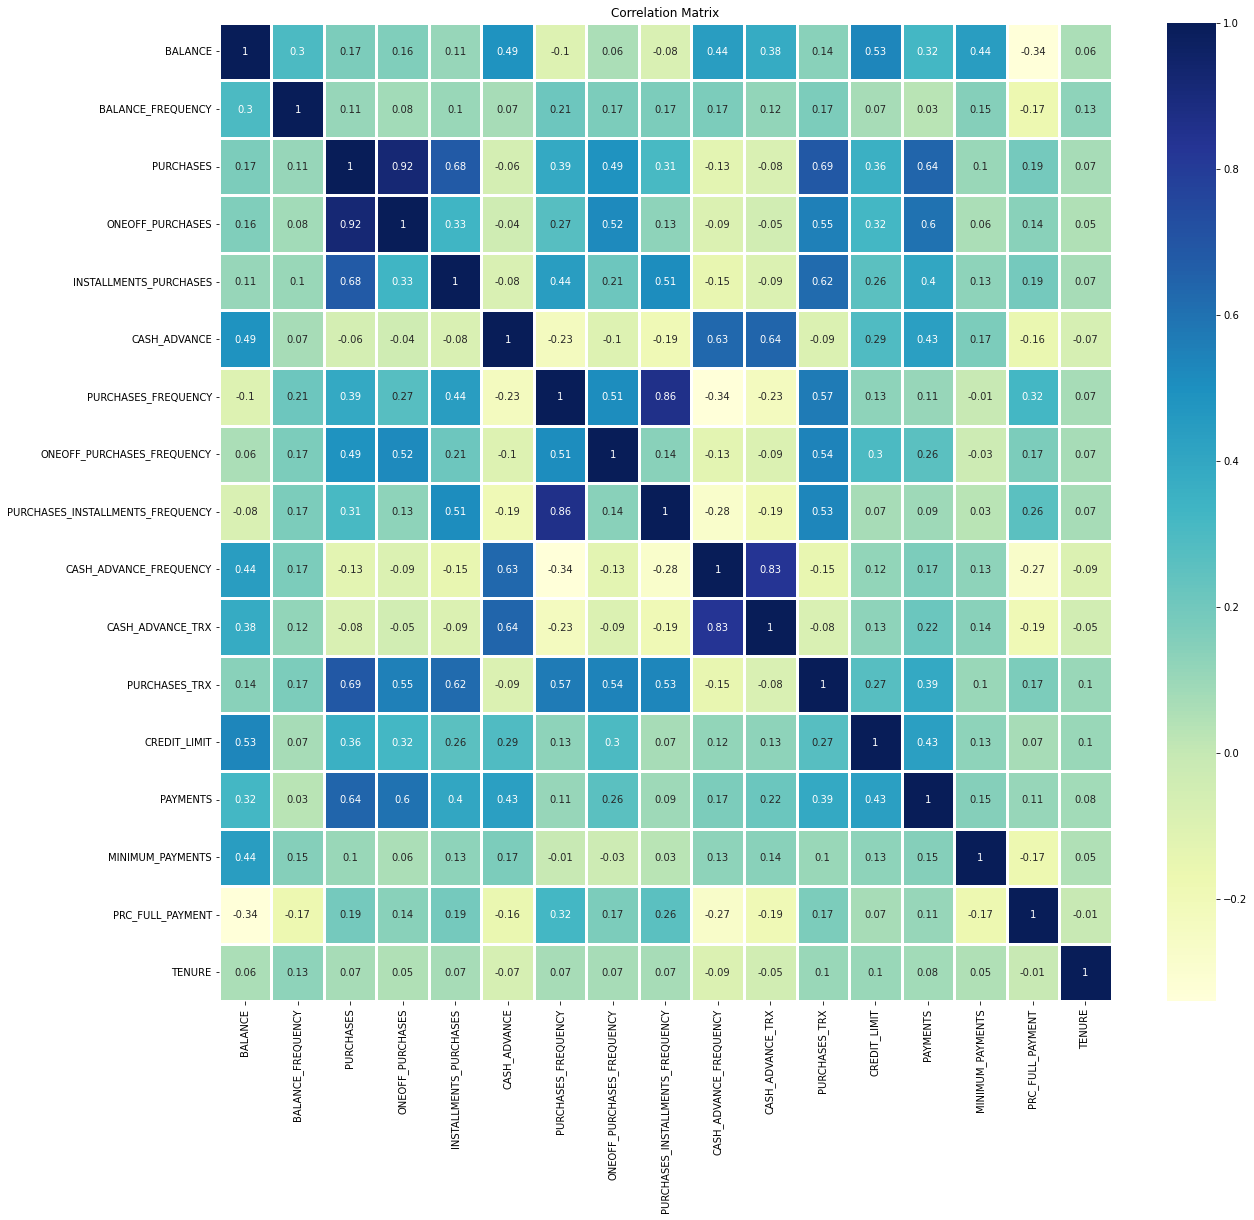

In [43]:
plt.figure(figsize=(20,18))
sns.heatmap(round(df1.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [44]:
corr= df1.corr()

In [45]:
corr.abs().max().sort_values(ascending=False)

BALANCE                             1.0
CASH_ADVANCE_FREQUENCY              1.0
PRC_FULL_PAYMENT                    1.0
MINIMUM_PAYMENTS                    1.0
PAYMENTS                            1.0
CREDIT_LIMIT                        1.0
PURCHASES_TRX                       1.0
CASH_ADVANCE_TRX                    1.0
PURCHASES_INSTALLMENTS_FREQUENCY    1.0
BALANCE_FREQUENCY                   1.0
ONEOFF_PURCHASES_FREQUENCY          1.0
PURCHASES_FREQUENCY                 1.0
CASH_ADVANCE                        1.0
INSTALLMENTS_PURCHASES              1.0
ONEOFF_PURCHASES                    1.0
PURCHASES                           1.0
TENURE                              1.0
dtype: float64

Inference:¶
The correlation value above 0.80 is considered to be highly correlated. From the above heatmap, can observe the following:


We can see that there is multi-collinearity present in the data and would need to use dimension reduction technique as double redudancy information is being fed to the model.

In [ ]:
# Scaling the numerical variables



In [46]:
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
df=scaler1.fit_transform(df1)


### Applying PCA- 95 % of the varieance 

Will be performing Prinicipal Component Analysis(PCA) to reduce the dimensions.

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca_model = PCA(n_components = None)
X_PCA = pca_model.fit_transform(df1)

In [50]:
X_PCA.shape

(7985, 17)

In [51]:
# Cumulative Variance explained:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.49676288, 0.68834978, 0.81917777, 0.91069074, 0.95369876,
       0.9801275 , 0.9999913 , 0.99999866, 0.99999949, 0.99999998,
       0.99999999, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [52]:
from sklearn.decomposition import  PCA
pca=PCA(n_components=0.95)
df1 =pca.fit_transform(df)
explained_variance=pca.explained_variance_ratio_
print(explained_variance)

[0.27443646 0.20474901 0.08957772 0.07407699 0.06211909 0.05735766
 0.05044823 0.04110937 0.0365383  0.03071984 0.02352981 0.01763503]


In [53]:
df1.shape

(7985, 12)

# Clustering with KMean 

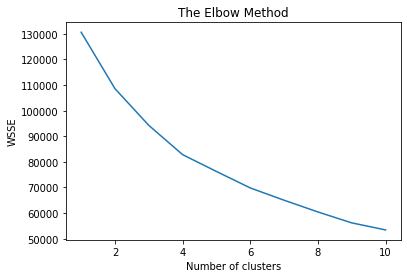

In [54]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,  random_state = 10)
    kmeans.fit(df1)
    wsse.append(kmeans.inertia_) # inertia is ststic term for wsse
plt.plot(range(1, 11), wsse)
#plt.scatter(range(1, 11),wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [55]:
print(wsse) # value for K 

[130627.07753832103, 108585.58108041678, 94259.64160466331, 82823.29266811762, 76262.80971828797, 69826.53321871272, 65030.92168388551, 60451.82295357907, 56185.4784786107, 53433.363401323586]


In [56]:
# fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 6 ,random_state = 10)
Y_pred = kmeans.fit_predict(df1) 





In [58]:
df1=pd.DataFrame(df1,columns=["col"+str(x) for x in range(1,13)])

In [59]:
# ADD it also to  the original data frame
df1["cluster"]=Y_pred

In [60]:
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,cluster
0,-1.708910,-1.256644,0.542658,0.726385,0.201812,0.054905,0.772756,-0.216229,-0.158051,-0.095450,-0.209454,-0.079607,3
1,-1.383117,2.468935,0.778113,-0.288432,0.552269,-1.120307,-0.311670,-0.075944,0.760153,-0.844772,-0.963822,-0.610967,2
2,0.867262,-0.401430,-0.119106,1.397921,-1.892527,-0.161606,-1.740544,0.169000,-0.748341,-0.027538,-0.720431,0.754800,1
3,-1.636423,-0.839055,0.227476,1.157378,-0.322041,0.151128,0.664985,-0.143431,0.534098,-0.063420,-0.444381,-0.139258,3
4,0.184215,-0.749553,-1.255514,0.651575,1.037037,0.341344,0.762301,-0.044392,0.306927,-0.178805,-0.197595,0.375279,4


<AxesSubplot:xlabel='col1', ylabel='col3'>

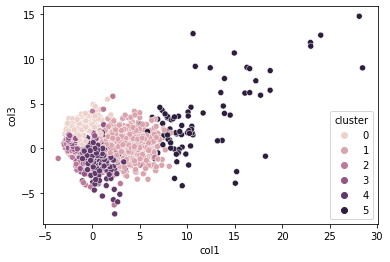

In [61]:
sns.scatterplot(data=df1 ,x=df1["col1"],y=df1["col3"],hue = df1['cluster'])

<AxesSubplot:xlabel='cluster', ylabel='count'>

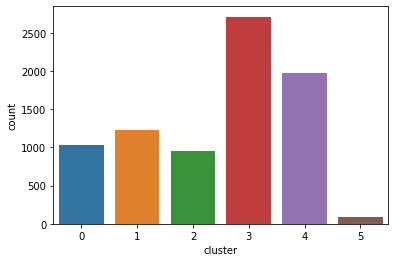

In [62]:
sns.countplot(x=df1["cluster"])

We can see that the number of customers in each cluster is approximately the same.

# Silhouette Score method 

In [63]:
from sklearn.metrics import silhouette_score 
n_cluster = [2,3,4,5,6,7,8,9,10]

for K in n_cluster:
    cluster= KMeans (n_clusters=K,random_state=10)
    predict = cluster.fit_predict(df1)
    
    score = silhouette_score(df1,predict,random_state=10)
    print("for n_cluster={}, silhouette score is {}".format(K,score))

for n_cluster=2, silhouette score is 0.20022521581971214
for n_cluster=3, silhouette score is 0.19714196188211563
for n_cluster=4, silhouette score is 0.2912895253755663
for n_cluster=5, silhouette score is 0.27062638699746283
for n_cluster=6, silhouette score is 0.28720367967068966
for n_cluster=7, silhouette score is 0.2928702509267483
for n_cluster=8, silhouette score is 0.2960151139485276
for n_cluster=9, silhouette score is 0.2849762593595664
for n_cluster=10, silhouette score is 0.288078929016404


The optimum value for K is associated with the high value of the 'silhouette score'. From the above output it can be seen that, for K = 3, the silhouette score is highest. Thus, we build the clusters with K = 3

In [64]:
# fitting K-Means to the dataset
kmeans = KMeans(n_clusters= 6 ,random_state = 10)
Y_pred = kmeans.fit_predict(df1)

In [65]:
# ADD it also to  the original data frame
df1["Silhouette_cluster"]=Y_pred

<AxesSubplot:xlabel='Silhouette_cluster', ylabel='count'>

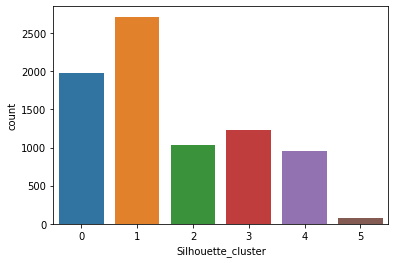

In [66]:
sns.countplot(x=df1["Silhouette_cluster"])

<AxesSubplot:xlabel='col1', ylabel='col3'>

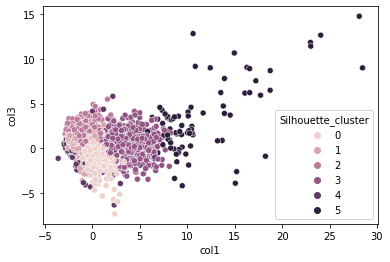

In [67]:
sns.scatterplot(data=df1 ,x=df1["col1"],y=df1["col3"],hue = df1['Silhouette_cluster'])